Tarea

- Crear una red convolucional con el dataset MNIST
- Guardar el modelo con .save
- Hacer Predicciones con imagenes
- Realizar metricas de evaluación

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the data to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
import tensorflow as tf

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Train the model
#model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test)

# Evaluate the model
#test_loss, test_acc = model.evaluate(x_test, y_test)
#print('Test accuracy:', test_acc)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training.log', separator=',', append=False)
model.fit(x_train, y_train, epochs=2, callbacks=[csv_logger])

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8855 - loss: 0.3657
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9826 - loss: 0.0582


In [ ]:
import pandas as pd
log_data = pd.read_csv('training.log', sep=',', engine='python')
log_data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.950300,0.161830,NaN,NaN
1,1,0.982733,0.055744,NaN,NaN


In [ ]:
log_data.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.950300,0.161830,NaN,NaN
1,1,0.982733,0.055744,NaN,NaN


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9870 - loss: 0.0392 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9910 - loss: 0.0296 - val_accuracy: 0.9889 - val_loss: 0.0335


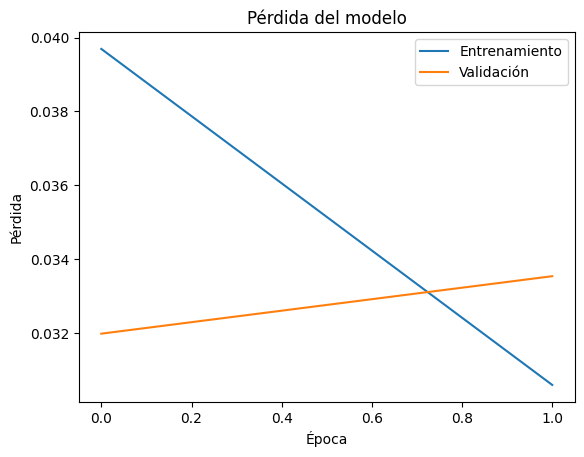

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un objeto 'history' devuelto por model.fit()
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [ ]:
model.save("mnist_model.keras")
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras


In [ ]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
y_pred = predict.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

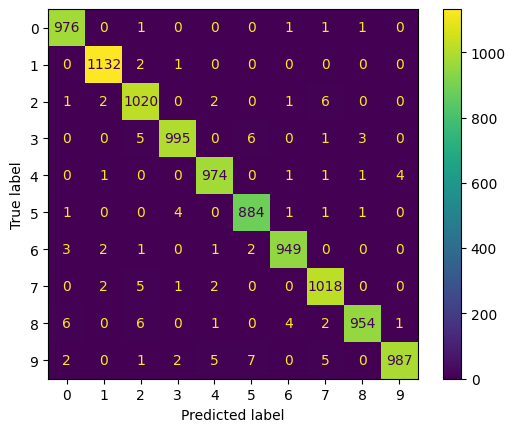

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

